
## Title: Movie Critic Prediction Using Advance Machine Learning
* Presented By: Sruthi Puthiyandy
* Supervised By: Prof. Dr. Yasin Ceren


## Vision 
The primary goal from this project is to predict the tomatometer rating which is highly accurate using a machine learning model by using the dataset got from rotten tomatoes streaming website dataset for movies based on various numerical and textual attributes. The tomatometer rating represents the aggregated percentage of positive reviews from critics. 

In [548]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sbn 

### Loading the data

In [560]:
data=pd.read_csv("rotten_tomatoes_movies.csv") 


In [409]:
data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


### Uderstand and EDA on data

In [410]:
data.shape

(17710, 22)

In [412]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17705    False
17706    False
17707    False
17708    False
17709    False
Length: 17710, dtype: bool

In [413]:
data.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17396.000000,17666.000000,17666.000000,17414.000000,1.741300e+04,17710.000000,17710.000000,17710.000000
mean,102.214475,60.883618,57.145477,60.554841,1.439565e+05,14.587804,36.378374,20.705251
std,18.703064,28.444754,68.371835,20.543890,1.763678e+06,15.146557,52.602951,30.249490
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.080000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.280000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.499100e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17710 non-null  object 
 1   movie_title                       17710 non-null  object 
 2   movie_info                        17389 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17710 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17516 non-null  object 
 7   authors                           16168 non-null  object 
 8   actors                            17358 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17326 non-null  object 
 11  runtime                           17396 non-null  float64
 12  prod

In [415]:
data.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8576
content_rating                         0
genres                                17
directors                            194
authors                             1542
actors                               352
original_release_date               1164
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [12]:
data.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [416]:
data.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

## Dataset Evaluation and plan for preprocessing
1. There are 44 missing values in target - which is not useful for prediction - **Drop null values in target**
2. There are no duplicate rows
3. There are missing values below columns : 
    * movie_info----------------321 -- long text, replace with Nan,later fill with [No_INFO], so NLP will not break
    * critics_consensus---------8578 -- long text, replace with Nan,later fill with [No_INFO], so NLP will not break
    * genres--------------------19 -- Object, fill with NaN, later **encode**
    * directors-----------------194 -- Object, fill with NaN, later **encode**
    * authors-------------------1542 -- Object, fill with NaN, later **encode**
    * actors--------------------352 -- Object, fill with NaN, later **encode**
    * original_release_date-----1166 
    * streaming_release_date----384
    * runtime-------------------314 -- numerical, **impute** the value
    * production_company--------499 -- Object, fill with NaN, later **encode**
    * tomatometer_status--------44 -- if tomatometer_rating null drops this will get rectified or dropped
    * tomatometer_rating--------44 -- **Drop**
    * tomatometer_count---------44 -- if tomatometer_rating null drops this will get rectified or dropped
    * audience_status-----------448 -- Object, fill with NaN, later **encode**
    * audience_rating-----------296 -- numerical, **impute** the value
    * audience_count------------297 -- numerical, **impute** the value
4. Temparel Series we need to do a **feature engineering**
    * We can see a lot of missing values in date and droping it is not a good choice, it will result in major number of data there by information lose and effect the model prediction. Instead will do a feature engineering on it.
    * **Extract relevent numerical features** like extract the correct year, extracting data in each month, analysing release pattern or periodicity, calculate time difference, time since a reference point etc. 
    * Decided to extract new features: 
        1. First convert the column to datetime format/object
        2. Extract granular features: year, month, day_of_week, day_of_year, week_of_year
        3. Calculate the time differences: difference_original_latest_release_date - difference between fixed reference point like latest relaese date to the original relaese date, gap_in_streamin_date - difference between original release date and streaming relaese date
        4. Capture the periodicity of release date for original and streaming
5. Text Feature Engineering - advanced
    * Clean the text: 
        1. standardize the text by converting all into lower case
        2. remove punctuation, numbers, special characters unless relevent
        3. Lemmatization: reduce the words to their base form, "running" to "run", use libraries NLTK, SpaCy
        4. Remove stop words, connectives - like "is", "the", "a"
    * Vectorize
        1. TF-IDF: As a strong baseline, use TfidfVectorizer from scikit-learn to create numerical feature vectors. This captures word importance.
        2. Pre-trained Word Embeddings (e.g., Word2Vec, GloVe, FastText): For a more advanced approach, use pre-trained embeddings. You can calculate the average of word embeddings for all words in movie_info and critics_consensus to get a fixed-size vector representation for each text.
        3. Contextual Embeddings (Highly Recommended Advanced Method): Leverage models like Sentence-BERT (SBERT) or Universal Sentence Encoder (USE). These models generate high-quality, dense vector embeddings for entire sentences or paragraphs, capturing semantic meaning and context far better than traditional methods. You would get a single vector for each movie_info and critics_consensus entry. These embeddings would become direct numerical features for your regression model.
6. Categorical feature encoding - advanced 
    1. High-Cardinality Features (genres, directors, authors, actors, production_company): These columns can have thousands of unique values.
        * Multi-label Binarization for genres: Since a movie can have multiple genres, use MultiLabelBinarizer to create a binary (0/1) column for each genre.
        * Target Encoding (or Mean Encoding): This is an advanced technique where each category is replaced by the mean tomatometer_rating of all movies belonging to that category. This can capture the predictive power of categories but requires careful implementation (e.g., using cross-validation folds) to prevent data leakage.
        * Frequency Encoding: Replace categories with their overall frequency in the dataset.
        * Embedding Layers (for Deep Learning): If you eventually use a neural network, you can create learnable embedding layers for these categorical features.
    2. Low cardinality features (content_rating, tomatometer_status, audience_status):
        * One-Hot Encoding: Convert these into binary columns. For example, 'PG' would become content_rating_PG=1.
7. Numerical Feature Engineering:
    1. Create meaningful ratios:
        * fresh_to_rotten_ratio = tomatometer_fresh_critics_count / tomatometer_rotten_critics_count (handle division by zero).
        * top_critics_impact = tomatometer_top_critics_count / tomatometer_count.
    2. Polynomial Features or Interaction Terms: For example, runtime * audience_count or runtime^2 if you suspect non-linear relationships.
6. Finally do Feature scaling - we will decide which is best scaler in this case at the final stage




### Data Cleansing ----------------------------------------------------------------------------

#### 1. Drop NULL values in target


In [561]:
# Drop null values in target
data_clean=data.copy()  ## Made a copy of the data to use further
data_clean.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [562]:
data_clean.dropna(subset=['tomatometer_rating'], inplace=True) ## Deleting the null's

In [563]:
data_clean['tomatometer_rating'].isnull().sum() ## checking the null's are deleted

np.int64(0)

In [420]:
data_clean.shape

(17666, 22)

In [421]:
data_clean.duplicated().sum()

np.int64(0)

In [422]:
data_clean.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           291
critics_consensus                   8532
content_rating                         0
genres                                17
directors                            193
authors                             1534
actors                               352
original_release_date               1152
streaming_release_date               352
runtime                              284
production_company                   493
tomatometer_status                     0
tomatometer_rating                     0
tomatometer_count                      0
audience_status                      413
audience_rating                      261
audience_count                       262
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [423]:
data_clean.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           291
critics_consensus                   8532
content_rating                         0
genres                                17
directors                            193
authors                             1534
actors                               352
original_release_date               1152
streaming_release_date               352
runtime                              284
production_company                   493
tomatometer_status                     0
tomatometer_rating                     0
tomatometer_count                      0
audience_status                      413
audience_rating                      261
audience_count                       262
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

### 2. No duplicates in row wise total data count = 17668

In [426]:
data.duplicated().sum()

np.int64(0)

### 3. Correcting the formats - date are in object format and convert to datetime

In [564]:
# Conver date columns into datetime
data_clean['original_release_date']=pd.to_datetime(data_clean['original_release_date'],errors='coerce')
##coerce - will make the unparceble date into NaT
data_clean['streaming_release_date']=pd.to_datetime(data_clean['streaming_release_date'],errors='coerce')


In [428]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17666 entries, 0 to 17709
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rotten_tomatoes_link              17666 non-null  object        
 1   movie_title                       17666 non-null  object        
 2   movie_info                        17375 non-null  object        
 3   critics_consensus                 9134 non-null   object        
 4   content_rating                    17666 non-null  object        
 5   genres                            17649 non-null  object        
 6   directors                         17473 non-null  object        
 7   authors                           16132 non-null  object        
 8   actors                            17314 non-null  object        
 9   original_release_date             16514 non-null  datetime64[ns]
 10  streaming_release_date            17314 non-null  d

### 4. Droping redundant column - rotten_tomatoes_link, movie_title -- are almost direct and derivable with unique values. we can drop rotten_tomatoes_link column

In [559]:
data_clean.head()

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [565]:
data_clean.drop('rotten_tomatoes_link',axis=1,inplace=True)

### 5. Handling outliers or chceking the imbalance of the target and other data

In [430]:
data_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
original_release_date,16514,2000-01-22 12:28:20.375438976,1914-06-01 00:00:00,1993-05-07 00:00:00,2006-10-21 00:00:00,2013-10-30 06:00:00,2020-09-30 00:00:00,NaN
streaming_release_date,17314,2016-02-06 22:50:23.218204672,1998-07-07 00:00:00,2015-09-29 00:00:00,2016-08-10 00:00:00,2017-03-21 00:00:00,2020-10-29 00:00:00,NaN
runtime,17382.0,102.220918,5.0,90.0,99.0,111.0,266.0,18.692783
tomatometer_rating,17666.0,60.883618,0.0,38.0,67.0,86.0,100.0,28.444754
tomatometer_count,17666.0,57.145477,5.0,12.0,28.0,75.0,574.0,68.371835
audience_rating,17405.0,60.556966,0.0,45.0,63.0,78.0,100.0,20.539121
audience_count,17404.0,144030.737474,5.0,709.0,4287.5,25091.0,35797635.0,1764131.000775
tomatometer_top_critics_count,17666.0,14.606815,0.0,3.0,8.0,23.0,69.0,15.153381
tomatometer_fresh_critics_count,17666.0,36.423129,0.0,6.0,16.0,44.0,497.0,52.647461
tomatometer_rotten_critics_count,17666.0,20.73299,0.0,3.0,8.0,24.0,303.0,30.26744


In [431]:
data_analysis=data_clean.copy()## duplicating the data_clean for analysis

In [432]:
data_analysis['release_year']=data_analysis['original_release_date'].dt.year

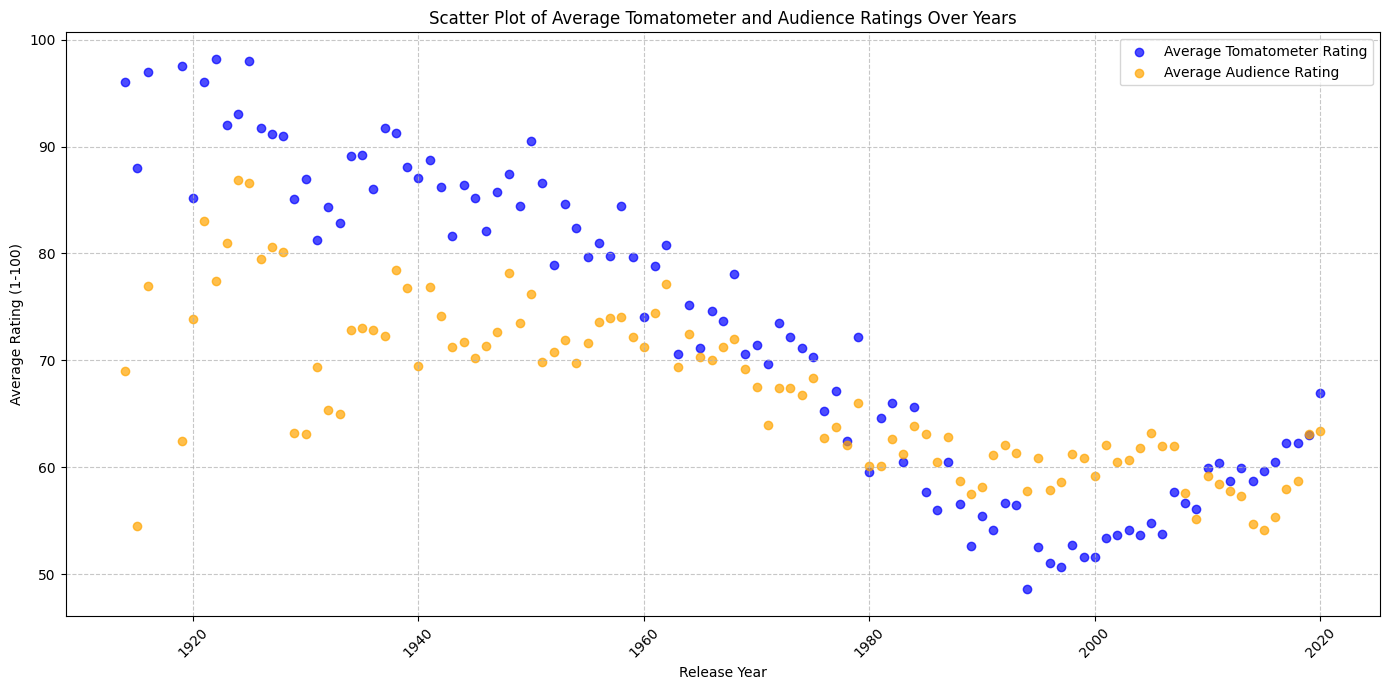

In [433]:
avg_rating_by_year=data_analysis.groupby('release_year')[['tomatometer_rating','audience_rating']].mean().reset_index()
## done grouping of tomatometer_rating and audience_rating by release_year
plt.figure(figsize=(14,7))
# Scatter plot for Average Tomatometer Rating
plt.scatter(x=avg_rating_by_year['release_year'],
            y=avg_rating_by_year['tomatometer_rating'],
            label='Average Tomatometer Rating',
            alpha=0.7, # Transparency for overlapping points
            color='blue')

# Scatter plot for Average Audience Rating
plt.scatter(x=avg_rating_by_year['release_year'],
            y=avg_rating_by_year['audience_rating'],
            label='Average Audience Rating',
            alpha=0.7, # Transparency for overlapping points
            color='orange')

# Add title and labels for clarity
plt.title('Scatter Plot of Average Tomatometer and Audience Ratings Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating (1-100)')

# Add a grid for easier reading
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=45)

# Add a legend to distinguish the two rating types
plt.legend()

# Ensure all elements fit in the plot area
plt.tight_layout()

# Display the plot
plt.show() # Use plt.show() if running in a script or interactive environment
# plt.savefig('tomatometer_and_audience_rating_scatter_no_reg.p



--- Outlier Analysis for Numerical Features ---


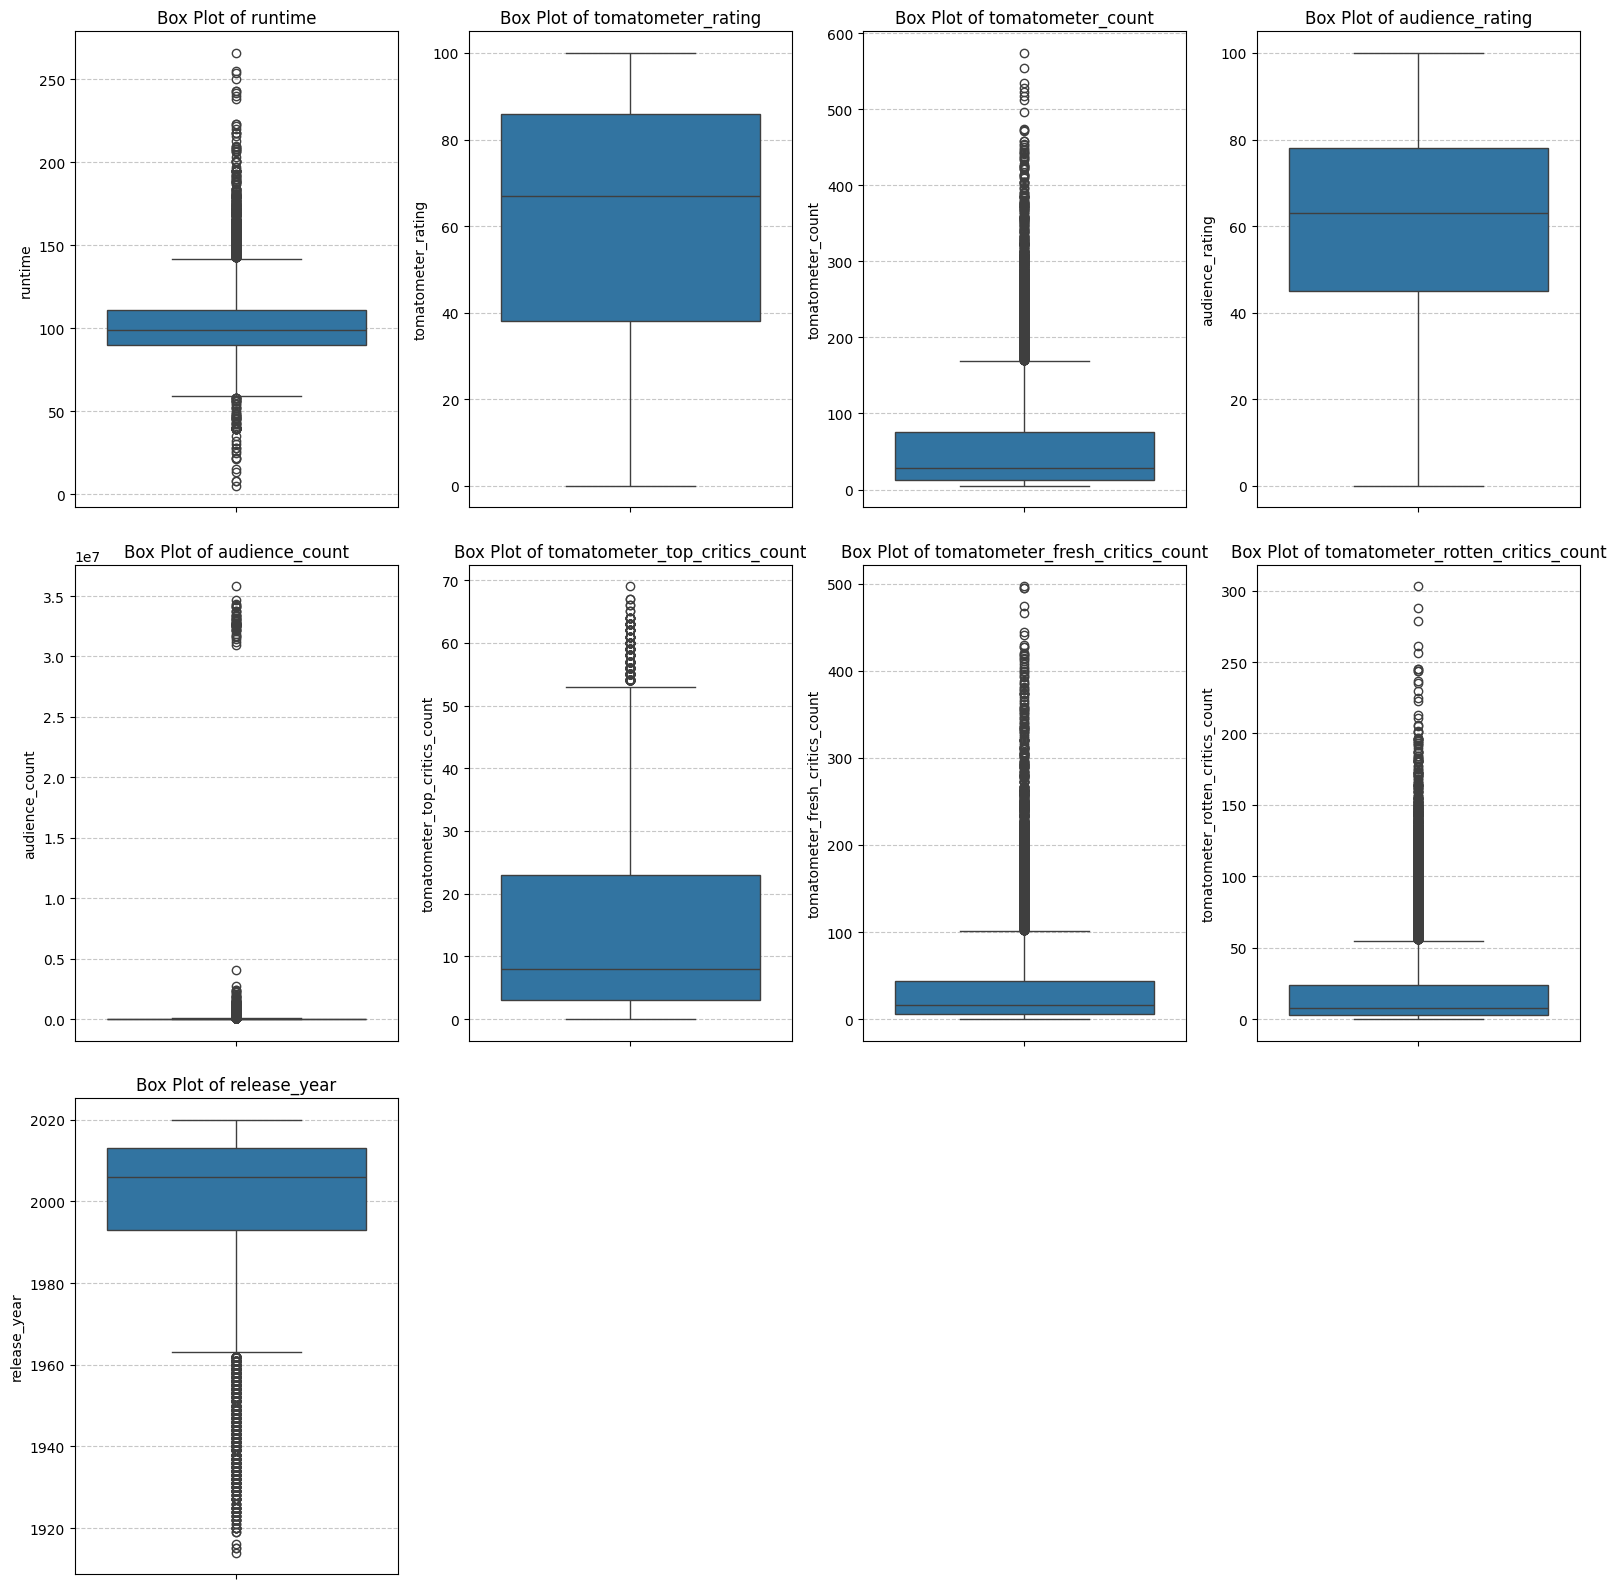


Outlier details for 'runtime':
  Number of outliers detected: 624 (3.53%)

Outlier details for 'tomatometer_rating':
  Number of outliers detected: 0 (0.00%)

Outlier details for 'tomatometer_count':
  Number of outliers detected: 1419 (8.03%)

Outlier details for 'audience_rating':
  Number of outliers detected: 0 (0.00%)

Outlier details for 'audience_count':
  Number of outliers detected: 2624 (14.85%)

Outlier details for 'tomatometer_top_critics_count':
  Number of outliers detected: 299 (1.69%)

Outlier details for 'tomatometer_fresh_critics_count':
  Number of outliers detected: 1665 (9.42%)

Outlier details for 'tomatometer_rotten_critics_count':
  Number of outliers detected: 2034 (11.51%)

Outlier details for 'release_year':
  Number of outliers detected: 1202 (6.80%)


In [434]:
print("\n--- Outlier Analysis for Numerical Features ---")
numerical_cols = data_analysis.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(3, 4, figsize=(16, 4 * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sbn.boxplot(y=data_analysis[col].dropna(), ax=axes[i]) # Drop NaNs for plotting to avoid issues
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
  
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for col in numerical_cols:
    # Calculate IQR-based outliers
    Q1 = data_analysis[col].quantile(0.25)
    Q3 = data_analysis[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_analysis[(data_analysis[col] < lower_bound) | (data_analysis[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"\nOutlier details for '{col}':")
    # print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    # print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    # print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")
    print(f"  Number of outliers detected: {num_outliers} ({(num_outliers / len(data_analysis) * 100):.2f}%)")
    # if num_outliers > 0:
    #     print(f"  Sample outliers (head):\n{outliers[[col]].head()}")

C:\Users\sruth\AppData\Local\Temp\ipykernel_34452\3069066164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_analysis, order=data_analysis[col].value_counts().index, palette='viridis', ax=axes[idx])
C:\Users\sruth\AppData\Local\Temp\ipykernel_34452\3069066164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_analysis, order=data_analysis[col].value_counts().index, palette='viridis', ax=axes[idx])
C:\Users\sruth\AppData\Local\Temp\ipykernel_34452\3069066164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

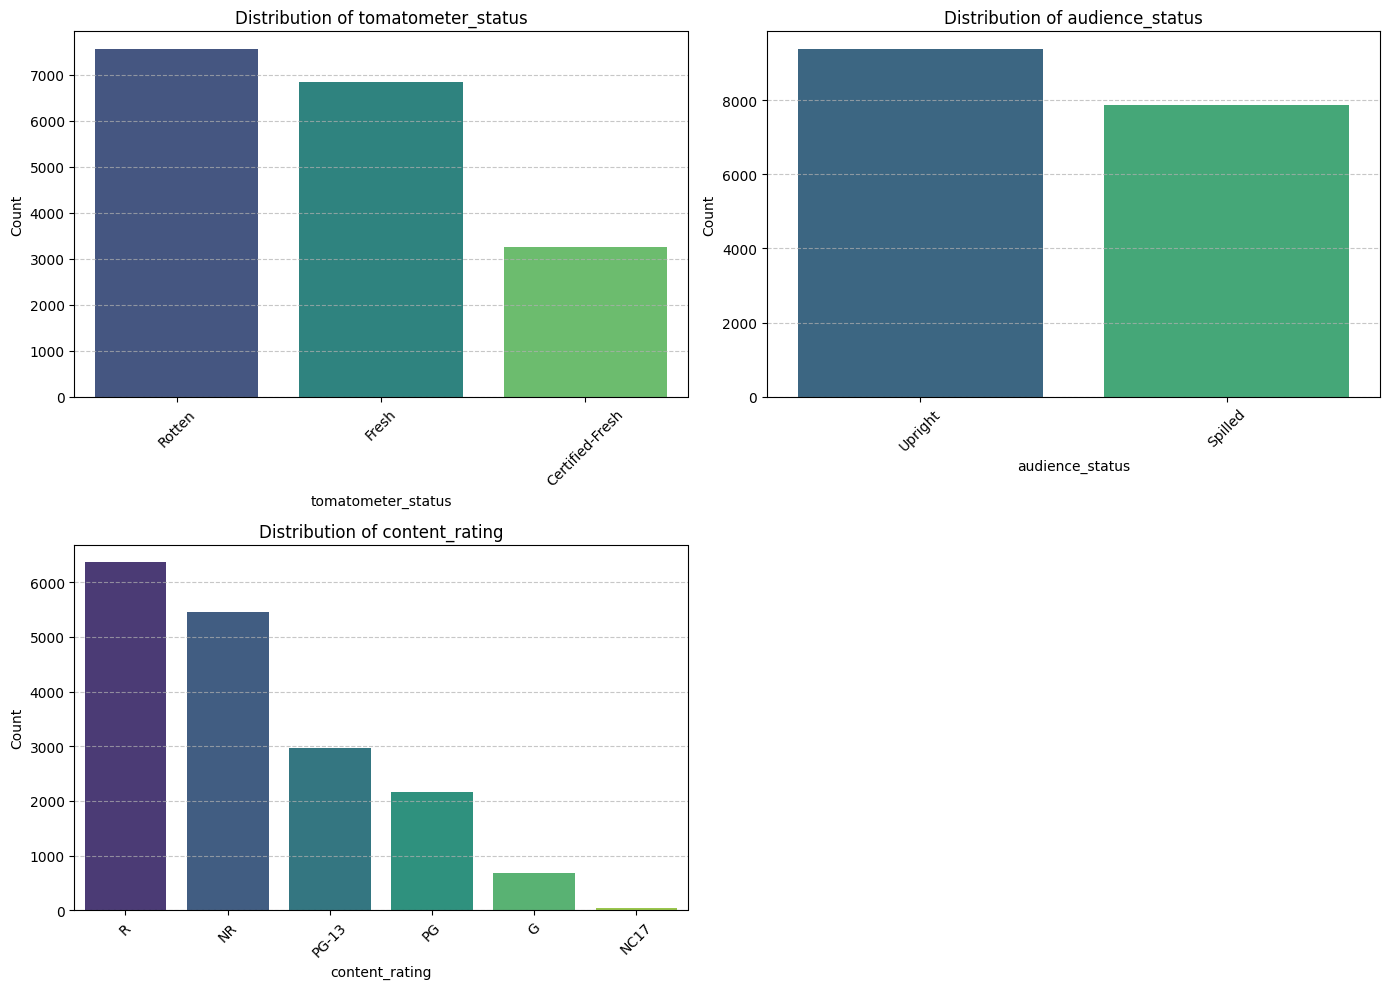

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns to plot
plot_cols = ['tomatometer_status', 'audience_status', 'content_rating']
n_cols = 2
n_rows = (len(plot_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # Flatten to index like a list

for idx, col in enumerate(plot_cols):
    sns.countplot(x=col, data=data_analysis, order=data_analysis[col].value_counts().index, palette='viridis', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

# Turn off unused subplot axes if any
for j in range(len(plot_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [435]:
data_analysis.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'release_year'],
      dtype='object')

In [436]:
# distribution of large data - like authors, genres, actors, directors, production_company

## 1. Let's check how many unique values are there in these columns
multi_valued_columns = ['authors', 'genres', 'actors', 'directors', 'production_company']
for col in multi_valued_columns:
    print(f"Unique values in {col} : {data_analysis[col].nunique()}")


Unique values in authors : 12962
Unique values in genres : 1104
Unique values in actors : 17286
Unique values in directors : 8911
Unique values in production_company : 3039


In [438]:
## Let's find the value count for each multivalued or large data columns
data_analysis['actors'].value_counts().head(10)

actors
Jim Gaffigan        4
Werner Herzog       4
Chris Rock          4
Patton Oswalt       4
Mike Birbiglia      3
Anthony Jeselnik    2
Robert Reich        2
Amy Schumer         2
Ali Wong            2
Spalding Gray       2
Name: count, dtype: int64

In [439]:
## Let's find the value count for each multivalued or large data columns
data_analysis['directors'].value_counts().head(10)

directors
Clint Eastwood       38
Woody Allen          36
Alfred Hitchcock     36
Sidney Lumet         31
Steven Spielberg     30
Martin Scorsese      28
Blake Edwards        27
John Ford            27
Steven Soderbergh    26
Werner Herzog        25
Name: count, dtype: int64

In [440]:
## Let's find the value count for each multivalued or large data columns
data_analysis['genres'].value_counts().head(10)

genres
Drama                               1884
Comedy                              1259
Comedy, Drama                        862
Drama, Mystery & Suspense            728
Art House & International, Drama     587
Documentary, Special Interest        553
Documentary                          525
Horror                               453
Action & Adventure, Drama            363
Horror, Mystery & Suspense           340
Name: count, dtype: int64

In [441]:
## Let's find the value count for each multivalued or large data columns
data_analysis['authors'].value_counts().head(10)

authors
Woody Allen        33
Tyler Perry        20
Werner Herzog      20
Neil Simon         19
Ingmar Bergman     19
David Mamet        18
John Sayles        15
Larry Cohen        15
Pedro Almodóvar    14
Jim Jarmusch       13
Name: count, dtype: int64


--- Trend Analysis ---


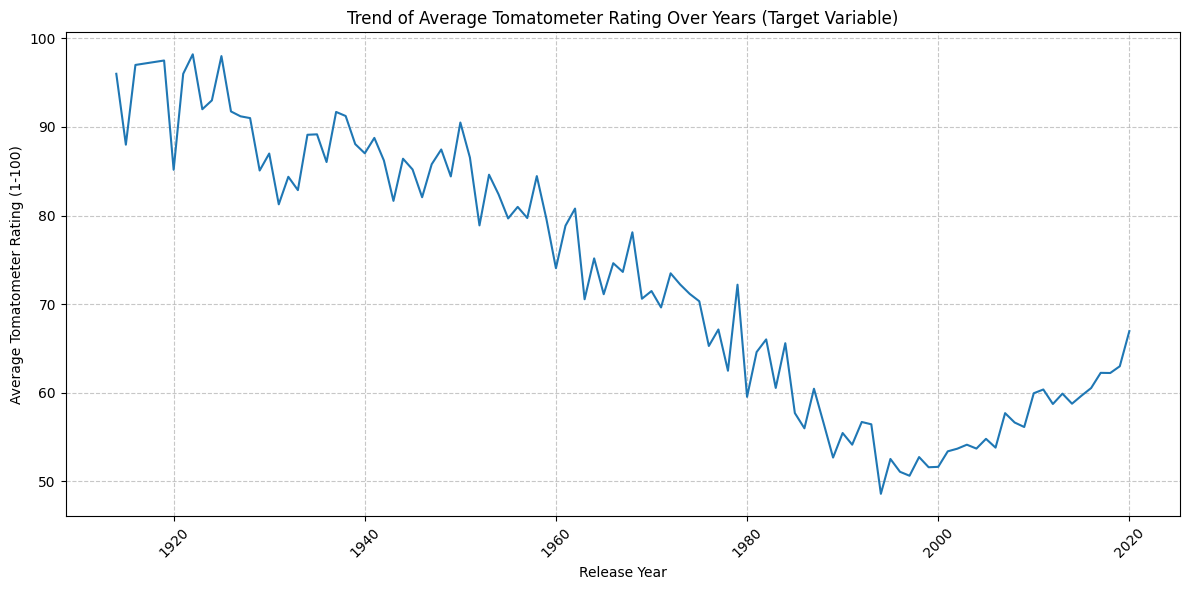

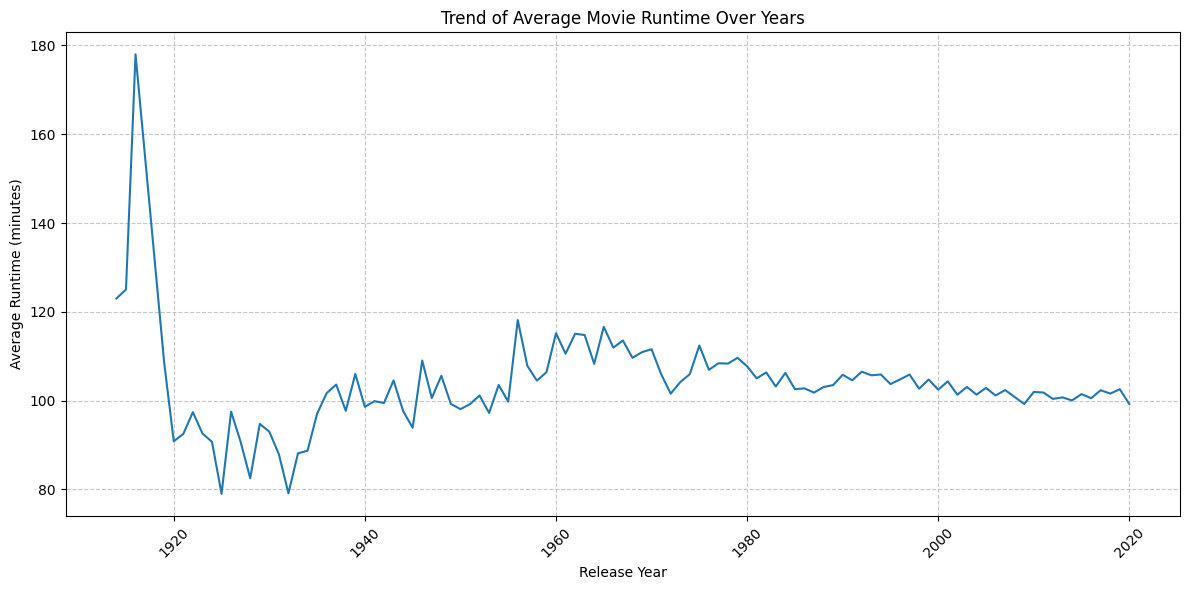

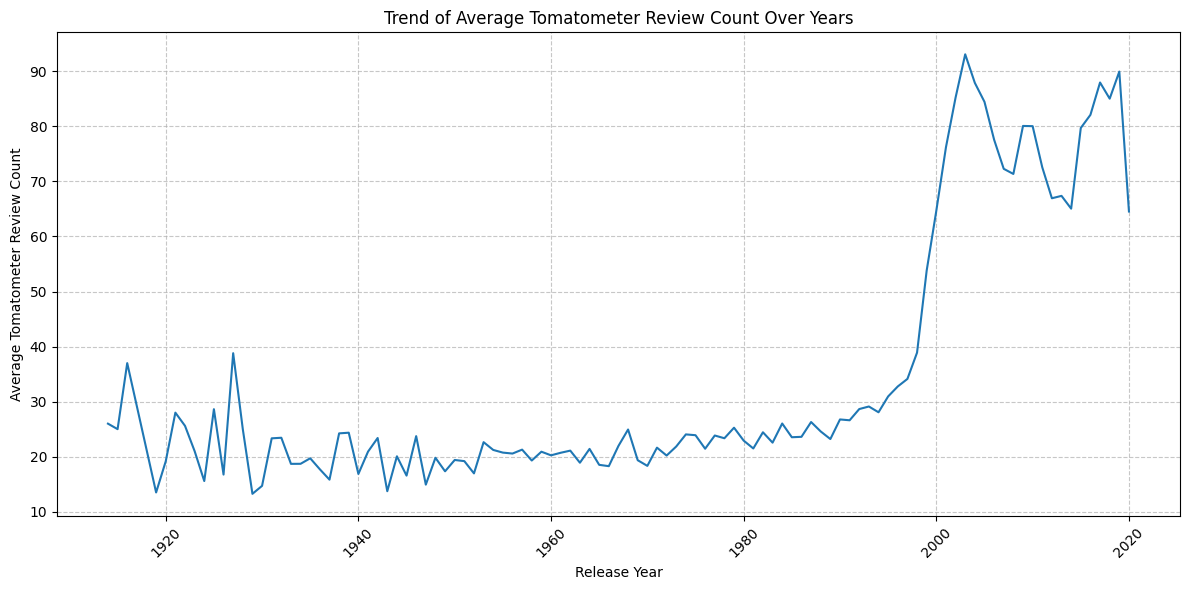

In [442]:
print("\n--- Trend Analysis ---")
# Ensure dates are datetime objects and 'release_year' is extracted
data_analysis['original_release_date'] = pd.to_datetime(data_analysis['original_release_date'], errors='coerce')
df_trends_full = data_analysis.dropna(subset=['original_release_date']).copy()
df_trends_full['release_year'] = df_trends_full['original_release_date'].dt.year

# Group by year and calculate the average for key metrics
yearly_avg_metrics = df_trends_full.groupby('release_year').agg(
    avg_tomatometer_rating=('tomatometer_rating', 'mean'),
    avg_audience_rating=('audience_rating', 'mean'),
    avg_runtime=('runtime', 'mean'),
    avg_tomatometer_count=('tomatometer_count', 'mean')
).reset_index()

# Plotting the trend of Average Tomatometer Rating over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='avg_tomatometer_rating', data=yearly_avg_metrics)
plt.title('Trend of Average Tomatometer Rating Over Years (Target Variable)')
plt.xlabel('Release Year')
plt.ylabel('Average Tomatometer Rating (1-100)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the trend of Average Runtime over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='avg_runtime', data=yearly_avg_metrics)
plt.title('Trend of Average Movie Runtime Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the trend of Average Tomatometer Review Count over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='avg_tomatometer_count', data=yearly_avg_metrics)
plt.title('Trend of Average Tomatometer Review Count Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Tomatometer Review Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Distribution for 'genres' (Top 20):
                        Genre  Count
0                       Drama   9521
1                      Comedy   5663
2          Action & Adventure   3542
3          Mystery & Suspense   3525
4   Art House & International   2494
5                 Documentary   2061
6                      Horror   2038
7                     Romance   1912
8   Science Fiction & Fantasy   1856
9                    Classics   1647
10           Special Interest   1240
11              Kids & Family   1113
12  Musical & Performing Arts   1011
13                  Animation    626
14                    Western    301
15                 Television    269
16           Sports & Fitness    178
17                Cult Movies    104
18       Faith & Spirituality     79
19              Gay & Lesbian     78
  Total unique genres: 21


C:\Users\sruth\AppData\Local\Temp\ipykernel_34452\2371002683.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts.head(20), palette='viridis')


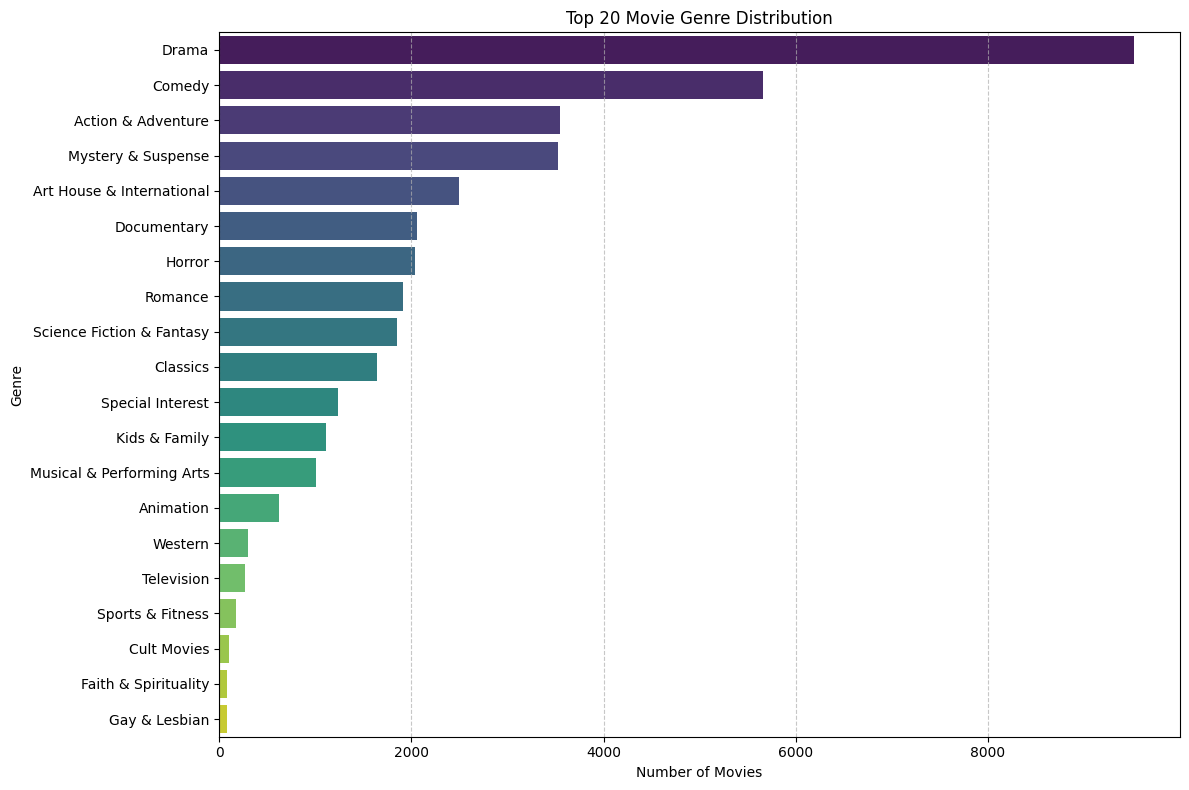

In [137]:
# Special handling for 'genres' as it's multi-valued
print("\nDistribution for 'genres' (Top 20):")
df_genres = data_analysis['genres'].dropna()
all_genres = df_genres.str.split(', ').explode()
genre_counts = all_genres.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
print(genre_counts.head(20)) # Print top 20
print(f"  Total unique genres: {len(all_genres.unique())}")

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_counts.head(20), palette='viridis')
plt.title('Top 20 Movie Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### A cluster is found for below features -- which is useful for fillinf missing values

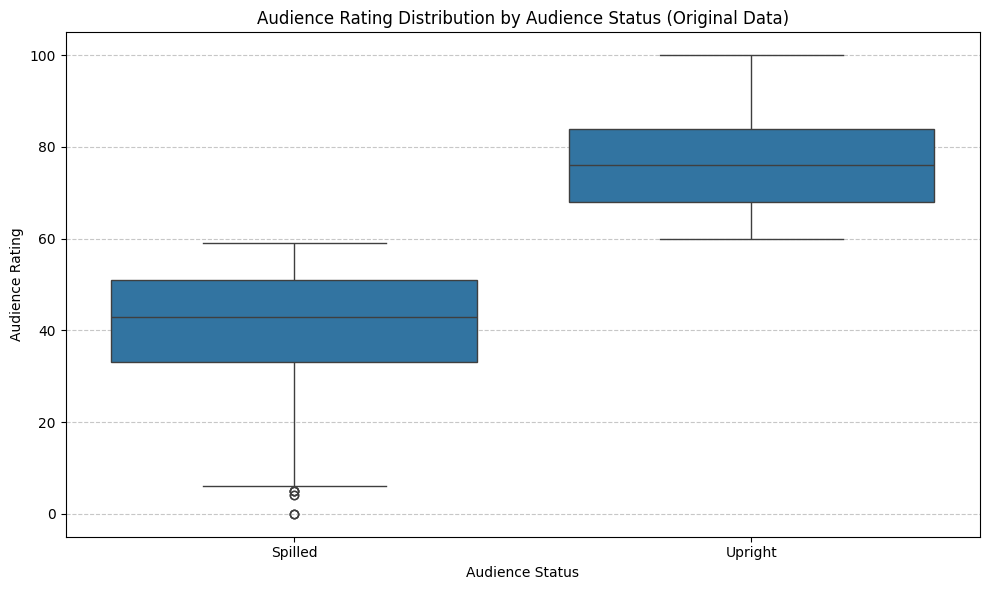

In [461]:
# Create the box plot to visualize the relationship between audience_status and audience_rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='audience_status', y='audience_rating', data=X_train)
plt.title('Audience Rating Distribution by Audience Status (Original Data)')
plt.xlabel('Audience Status')
plt.ylabel('Audience Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping